# TimeSeries

Demonstrate using the TimeSeries service.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

import synoptic

## Single Station, multi-variable

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 1 stations (0.27 seconds).


stid,date_time,variable,sensor_index,is_derived,value,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""UKBKB""",2024-12-11 05:00:00 UTC,"""air_temp""",1,false,26.0,"""Fahrenheit""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""UKBKB""",2024-12-11 05:15:00 UTC,"""air_temp""",1,false,26.0,"""Fahrenheit""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""UKBKB""",2024-12-11 05:30:00 UTC,"""air_temp""",1,false,26.0,"""Fahrenheit""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""UKBKB""",2024-12-11 05:45:00 UTC,"""air_temp""",1,false,26.0,"""Fahrenheit""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""UKBKB""",2024-12-11 06:00:00 UTC,"""air_temp""",1,false,25.0,"""Fahrenheit""",37032,"""EW2355 Spanish Fork""",4734.0,40.09867,-111.62767,65,"""UT""","""America/Denver""",4740.8,2013-03-13 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true


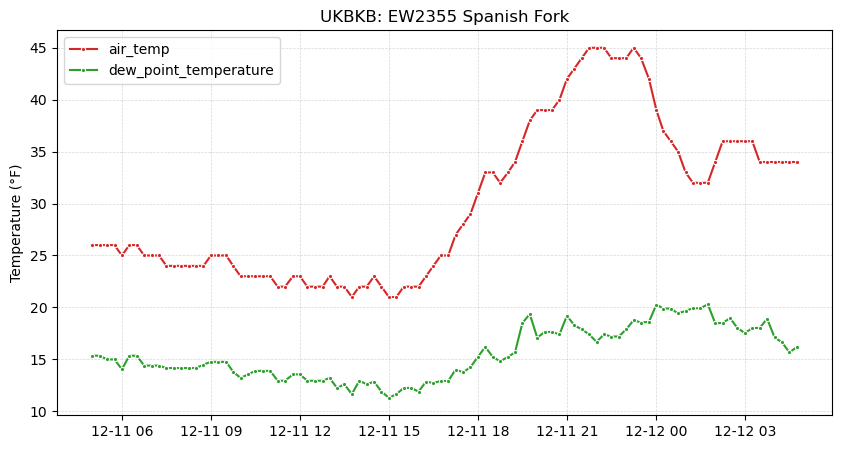

In [3]:
df = synoptic.TimeSeries(
    stid="ukbkb",
    recent=timedelta(hours=24),
    vars="air_temp,dew_point_temperature",
    units="english",
).df()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    df,
    x="date_time",
    y="value",
    hue="variable",
    marker=".",
    palette=["tab:red", "tab:green"],
)
ax.set_title(f"{df['stid'][0]}: {df['name'][0]}")
ax.set_ylabel("Temperature (°F)")
ax.set_xlabel("")
ax.grid(alpha=0.5, zorder=0, lw=0.5, ls="--")
ax.legend(title="")

df.head()

## Single variable, multi-station

🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (6.25 seconds).


stid,date_time,variable,sensor_index,is_derived,value,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,is_active
str,"datetime[μs, UTC]",str,u32,bool,f64,str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool
"""KSLC""",2024-12-11 04:54:00 UTC,"""air_temp""",1,false,28.94,"""Fahrenheit""",53,"""Salt Lake City, Salt Lake City…",4226.0,40.77069,-111.96503,1,"""UT""","""America/Denver""",4235.6,1997-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""KSLC""",2024-12-11 04:55:00 UTC,"""air_temp""",1,false,28.94,"""Fahrenheit""",53,"""Salt Lake City, Salt Lake City…",4226.0,40.77069,-111.96503,1,"""UT""","""America/Denver""",4235.6,1997-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""KSLC""",2024-12-11 05:00:00 UTC,"""air_temp""",1,false,28.94,"""Fahrenheit""",53,"""Salt Lake City, Salt Lake City…",4226.0,40.77069,-111.96503,1,"""UT""","""America/Denver""",4235.6,1997-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""KSLC""",2024-12-11 05:05:00 UTC,"""air_temp""",1,false,28.4,"""Fahrenheit""",53,"""Salt Lake City, Salt Lake City…",4226.0,40.77069,-111.96503,1,"""UT""","""America/Denver""",4235.6,1997-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true
"""KSLC""",2024-12-11 05:10:00 UTC,"""air_temp""",1,false,28.94,"""Fahrenheit""",53,"""Salt Lake City, Salt Lake City…",4226.0,40.77069,-111.96503,1,"""UT""","""America/Denver""",4235.6,1997-01-01 00:00:00 UTC,2024-12-12 04:30:00 UTC,false,false,true


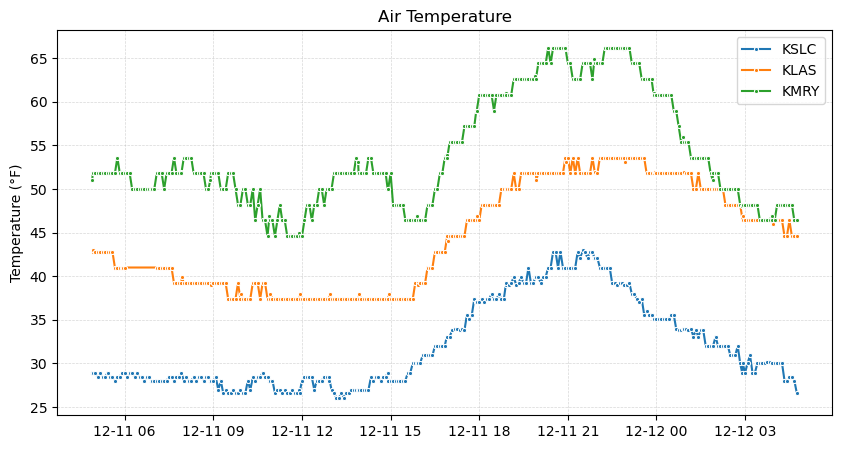

In [4]:
df = synoptic.TimeSeries(
    stid="kslc,kmry,klas",
    recent=timedelta(hours=24),
    vars="air_temp",
    units="english",
).df()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(
    df,
    x="date_time",
    y="value",
    hue="stid",
    marker=".",
)
ax.set_title("Air Temperature")
ax.set_ylabel("Temperature (°F)")
ax.set_xlabel("")
ax.grid(alpha=0.5, zorder=0, lw=0.5, ls="--")
ax.legend(title="")

df.head()